Fateme Ranjbaran
400126060

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Jan 29 08:55:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt
import tensorflow as tf
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Fraud_Detection/application_data.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# NAN Values

numbers of NANs

In [ ]:
print("\33[91m" ,"columns                     number of nan" , "\33[0m" )
print("========="*5)
for c in df.columns:
  print(f"{c:30}     {df[c].isna().sum()}")
  print("---------"*5)

 columns                     number of nan 
SK_ID_CURR                         0
---------------------------------------------
TARGET                             0
---------------------------------------------
NAME_CONTRACT_TYPE                 0
---------------------------------------------
CODE_GENDER                        0
---------------------------------------------
FLAG_OWN_CAR                       0
---------------------------------------------
FLAG_OWN_REALTY                    0
---------------------------------------------
CNT_CHILDREN                       0
---------------------------------------------
AMT_INCOME_TOTAL                   0
---------------------------------------------
AMT_CREDIT                         0
---------------------------------------------
AMT_ANNUITY                        12
---------------------------------------------
AMT_GOODS_PRICE                    278
---------------------------------------------
NAME_TYPE_SUITE                    1292



Our dataset has 307511 datas and we can eliminate columns with more than 95000 null values

In [ ]:
# delete columns that number of nan id greater than 95000
for c in df.columns:
  if df[c].isna().sum() > 95000:
    df.drop(c , inplace=True, axis=1)
    print(f'column   {c:30}   is deleted from dataframe')


column   OWN_CAR_AGE                      is deleted from dataframe
column   OCCUPATION_TYPE                  is deleted from dataframe
column   EXT_SOURCE_1                     is deleted from dataframe
column   APARTMENTS_AVG                   is deleted from dataframe
column   BASEMENTAREA_AVG                 is deleted from dataframe
column   YEARS_BEGINEXPLUATATION_AVG      is deleted from dataframe
column   YEARS_BUILD_AVG                  is deleted from dataframe
column   COMMONAREA_AVG                   is deleted from dataframe
column   ELEVATORS_AVG                    is deleted from dataframe
column   ENTRANCES_AVG                    is deleted from dataframe
column   FLOORSMAX_AVG                    is deleted from dataframe
column   FLOORSMIN_AVG                    is deleted from dataframe
column   LANDAREA_AVG                     is deleted from dataframe
column   LIVINGAPARTMENTS_AVG             is deleted from dataframe
column   LIVINGAREA_AVG                   is del

In [ ]:
df.shape

(307511, 72)

# still some columns has nan value. we can replace nan with zero,mean ,mode or delete that sample row

In [ ]:
original_samples_numbers = df.shape[0]
df = df.dropna()
df.shape

(244280, 72)

In [ ]:
# missing data in this method
(original_samples_numbers - df.shape[0]) / original_samples_numbers

0.2056219127120656

so in this case we lose 20% of data, that's ok.
if the lossing samples was large, we could use method "*fillna*" or "*input*" methods to replace nan values with reasonable values.




# Expert knowledge

we can delete some columns that we know they dont have any effect on TARGET

In [ ]:
for c in df.columns:print(c)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11

In [ ]:
# delete the columns that we know they havent any effect on TARGET
nonsense_columns = []
if nonsense_columns:
  df.drop(nonsense_columns, axis=1, inplace=True)

# working on categorical columns

In [ ]:
print("\033[92m", "categorical columns name            type of columns              first sample" , '\033[0m')
print("-------"*12)
for c in df.columns:
  print(f"{c:30}   {str(type(df[c].iloc[0])):30}     {df[c].iloc[0]}")

 categorical columns name            type of columns              first sample 
------------------------------------------------------------------------------------
SK_ID_CURR                       <class 'numpy.int64'>              100002
TARGET                           <class 'numpy.int64'>              1
NAME_CONTRACT_TYPE               <class 'str'>                      Cash loans
CODE_GENDER                      <class 'str'>                      M
FLAG_OWN_CAR                     <class 'str'>                      N
FLAG_OWN_REALTY                  <class 'str'>                      Y
CNT_CHILDREN                     <class 'numpy.int64'>              0
AMT_INCOME_TOTAL                 <class 'numpy.float64'>            202500.0
AMT_CREDIT                       <class 'numpy.float64'>            406597.5
AMT_ANNUITY                      <class 'numpy.float64'>            24700.5
AMT_GOODS_PRICE                  <class 'numpy.float64'>            351000.0
NAME_TYPE_SUITE         

In [ ]:
# unique values of categorical columns

categorical_columns = []
for c in df.columns:
  if type(df[c].iloc[0]) == str:
    print(c)
    print(df[c].unique())
    print("number of classes: " ,len(df[c].unique()))
    print("========="*10)
    categorical_columns.append(c)

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
number of classes:  2
CODE_GENDER
['M' 'F' 'XNA']
number of classes:  3
FLAG_OWN_CAR
['N' 'Y']
number of classes:  2
FLAG_OWN_REALTY
['Y' 'N']
number of classes:  2
NAME_TYPE_SUITE
['Unaccompanied' 'Spouse, partner' 'Children' 'Family' 'Other_A' 'Other_B'
 'Group of people']
number of classes:  7
NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman']
number of classes:  7
NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
number of classes:  5
NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Widow' 'Civil marriage' 'Separated']
number of classes:  5
NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Office apartment' 'Co-op apartment']
number of classes:  6
WEEKDAY_APPR_PROCESS_START
['WEDNESDAY' 'MONDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'THURSDAY' 

### OneHotEncoder

In [ ]:
# Performing one-hot encoding on nominal features
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# data = ohe.fit_transform(df)
# df = pd.DataFrame(data.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
# df

In [ ]:
for c in categorical_columns:
  for cc in df[c].unique():
    df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
  df.drop(c , axis=1, inplace=True)
  print(c)

<ipython-input-16-a10157274571>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [ ]:
df.shape

(244280, 165)

In [ ]:
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Trade: type 4
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307505,456249,0,0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384,365243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection using Random Forest

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
X = df.loc[:, df.columns != "TARGET"].values
y = df["TARGET"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=123)

In [ ]:
%%time
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

CPU times: user 8min 7s, sys: 452 ms, total: 8min 7s
Wall time: 8min 12s


RandomForestRegressor(random_state=0)

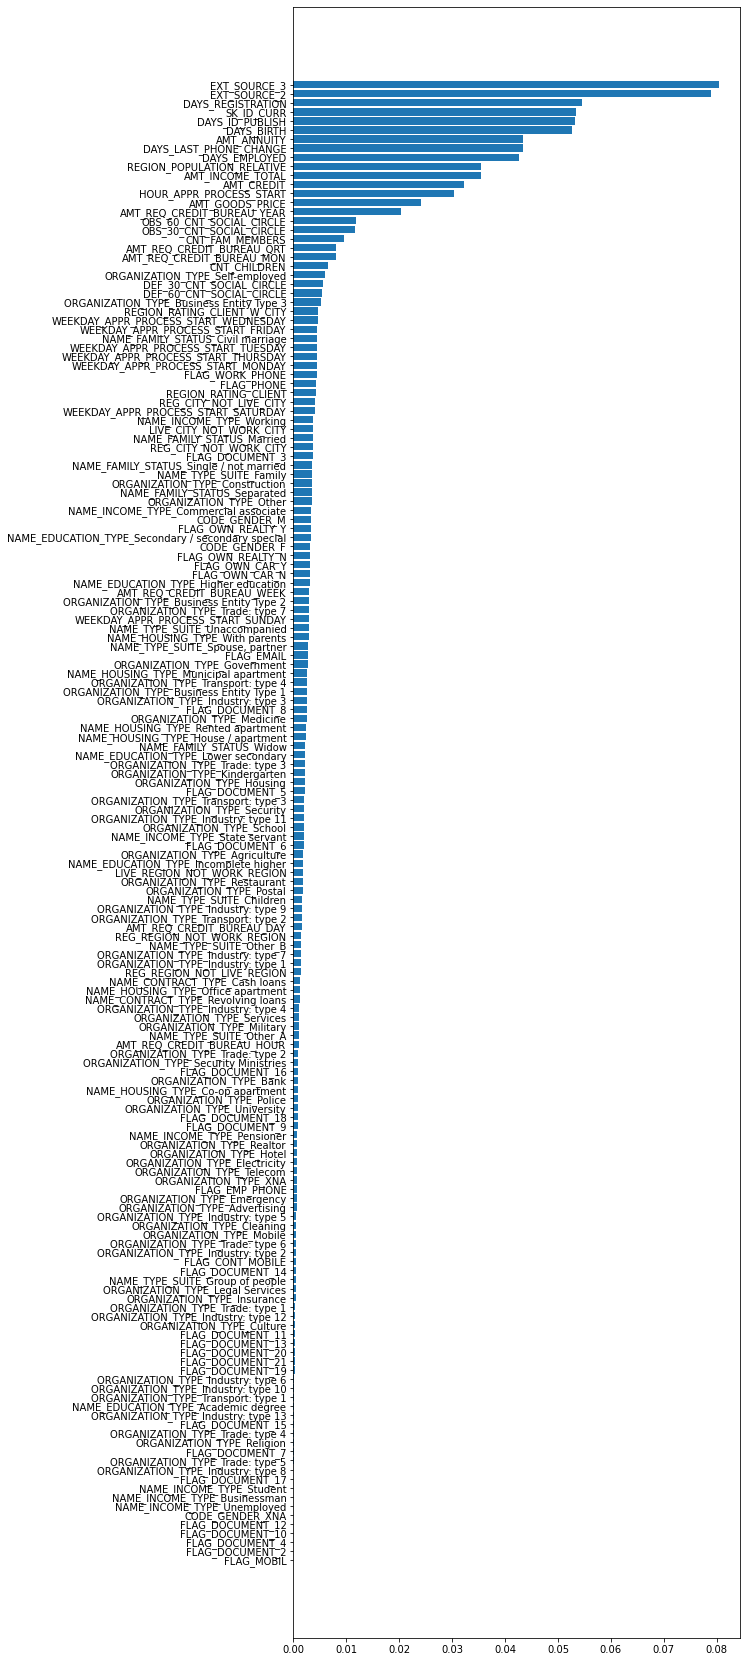

In [ ]:
cols = list(df.columns)
cols.remove("TARGET")
features = cols

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(8,30))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
selected_features = []

for f ,v in zip(features,rf.feature_importances_):
  if v > 0.003:
    print(f)
    selected_features.append(f)

SK_ID_CURR
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_WORK_PHONE
FLAG_PHONE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_3
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER_M
CODE_GENDER_F
FLAG_OWN_CAR_N
FLAG_OWN_CAR_Y
FLAG_OWN_REALTY_Y
FLAG_OWN_REALTY_N
NAME_TYPE_SUITE_Family
NAME_INCOME_TYPE_Working
NAME_INCOME_TYPE_Commercial associate
NAME_EDUCATION_TYPE_Secondary / secondary special
NAME_EDUCATION_TYPE_Higher education
NAME_FAMILY_STATUS_Single / not married
NAME_FAMILY_STATUS_Married
NAME_FAMILY_STATUS_Civil marriage
NAME_FAMI

In [ ]:
len(selected_features)

58

In [ ]:
X = df[selected_features].values

scaling the data

In [ ]:
import tensorflow
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=123)

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
feature_vector_length = X_train_std.shape[1]

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model_mlp = Sequential()
model_mlp.add(Dense(50, input_shape=input_shape, activation='relu'))
# model.add(Dense(80, activation='tanh'))
# model.add(Dense(50, activation='tanh'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

# Configure the model and start training
model_mlp.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

import time
start_time = time.time()


callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001, patience=5)

history = model_mlp.fit(X_train_std, y_train, batch_size=64, epochs=20,callbacks=[callback] ,
                    verbose=1, shuffle=True ,validation_split=0.1)

print()
print("--- %s seconds ---" % (time.time() - start_time))

Feature shape: (58,)
Epoch 1/20
2405/2405 [==============================] - 10s 3ms/step - loss: 0.2536 - accuracy: 0.9213 - val_loss: 0.2458 - val_accuracy: 0.9229
Epoch 2/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2453 - accuracy: 0.9220 - val_loss: 0.2452 - val_accuracy: 0.9229
Epoch 3/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2433 - accuracy: 0.9220 - val_loss: 0.2450 - val_accuracy: 0.9229
Epoch 4/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2420 - accuracy: 0.9222 - val_loss: 0.2462 - val_accuracy: 0.9228
Epoch 5/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2408 - accuracy: 0.9223 - val_loss: 0.2459 - val_accuracy: 0.9229
Epoch 6/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2397 - accuracy: 0.9224 - val_loss: 0.2442 - val_accuracy: 0.9230
Epoch 7/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2388 - accuracy: 0.9224 - val_loss: 

In [ ]:
# Test, Loss and accuracy
loss_and_metrics = model_mlp.evaluate(X_test_std, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

2291/2291 [==============================] - 5s 2ms/step - loss: 0.2472 - accuracy: 0.9215
Loss =  0.24723784625530243
Accuracy =  0.9215244650840759


## class_weight

## precision , recall , f1_score , confusion matrix

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

y_pred = (model_mlp.predict(X_test_std) > 0.5).astype("int32")

print('Precision: %.3f' % precision_score( y_true=y_test, y_pred=y_pred ,  average='macro'))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

2291/2291 [==============================] - 3s 1ms/step
Precision: 0.668
Recall: 0.508
F1: 0.496


### confusion_matrix

Text(69.0, 0.5, 'True classes')

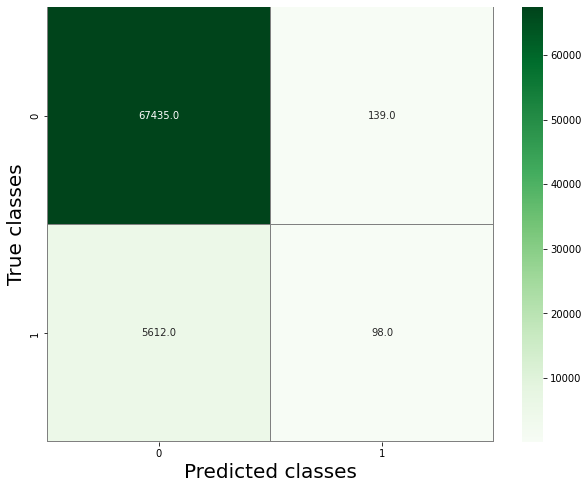

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

In [ ]:
best_precision=0
best_threshold = -1
for i in range(99):
  y_pred = np.where(model_mlp(X_test_std).numpy() > (i/100), 1, 0).astype("int32")
  precision = precision_score( y_true=y_test, y_pred=y_pred ,  average='macro')
  if precision > best_precision:
    best_precision = precision
    best_threshold = i/100


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

In [ ]:
print("best_precision:" , best_precision)
print("best_threshold:" , best_threshold)

best_precision: 0.9610482649454852
best_threshold: 0.83


# Autoencoder

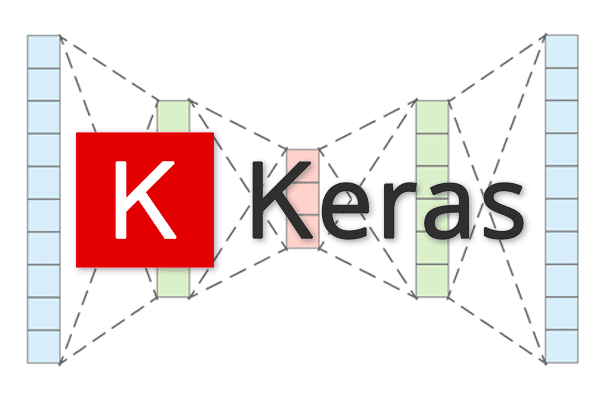

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


latent_dim = 32 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(45, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(45, activation='relu'),
      layers.Dense(58, activation='sigmoid'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


autoencoder.fit(X_train_std, X_train_std,
                epochs=10,
                shuffle=True,
                validation_data=(X_test_std, X_test_std))

Epoch 1/10
5344/5344 [==============================] - 18s 3ms/step - loss: 0.6631 - val_loss: 0.5892
Epoch 2/10
5344/5344 [==============================] - 17s 3ms/step - loss: 0.6070 - val_loss: 0.5830
Epoch 3/10
5344/5344 [==============================] - 16s 3ms/step - loss: 0.6036 - val_loss: 0.5810
Epoch 4/10
5344/5344 [==============================] - 17s 3ms/step - loss: 0.6023 - val_loss: 0.5804
Epoch 5/10
5344/5344 [==============================] - 16s 3ms/step - loss: 0.6022 - val_loss: 0.5804
Epoch 6/10
5344/5344 [==============================] - 18s 3ms/step - loss: 0.6020 - val_loss: 0.5802
Epoch 7/10
5344/5344 [==============================] - 16s 3ms/step - loss: 0.6020 - val_loss: 0.5805
Epoch 8/10
5344/5344 [==============================] - 16s 3ms/step - loss: 0.6020 - val_loss: 0.5803
Epoch 9/10
5344/5344 [==============================] - 18s 3ms/step - loss: 0.6020 - val_loss: 0.5801
Epoch 10/10
5344/5344 [==============================] - 16s 3ms/step - l

In [ ]:
encoded_inputs = autoencoder.encoder(X_test_std).numpy()
decoded_inputs = autoencoder.decoder(encoded_inputs).numpy()

In [ ]:
# precision_score, recall_score and f1_score with decoded_inputs( test data)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

y_pred = (model_mlp.predict(decoded_inputs) > 0.5).astype("int32")

print('Precision: %.3f' % precision_score( y_true=y_test, y_pred=y_pred ,  average='macro'))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

2291/2291 [==============================] - 3s 1ms/step
Precision: 0.461
Recall: 0.500
F1: 0.480


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# train model with encoded_inputs (train data)

encoded_inputs = autoencoder.encoder(X_train_std).numpy()
feature_vector_length = encoded_inputs.shape[1]

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model_mlp = Sequential()
model_mlp.add(Dense(50, input_shape=input_shape, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

model_mlp.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
import time
start_time = time.time()
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001, patience=5)
history = model_mlp.fit(encoded_inputs, y_train, batch_size=64, epochs=20,callbacks=[callback] ,
                    verbose=1, shuffle=True ,validation_split=0.1)

print()
print("--- %s seconds ---" % (time.time() - start_time))

Feature shape: (32,)
Epoch 1/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2820 - accuracy: 0.9195 - val_loss: 0.2634 - val_accuracy: 0.9229
Epoch 2/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2639 - accuracy: 0.9220 - val_loss: 0.2611 - val_accuracy: 0.9229
Epoch 3/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2628 - accuracy: 0.9220 - val_loss: 0.2621 - val_accuracy: 0.9229
Epoch 4/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2622 - accuracy: 0.9220 - val_loss: 0.2601 - val_accuracy: 0.9229
Epoch 5/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2615 - accuracy: 0.9220 - val_loss: 0.2608 - val_accuracy: 0.9229
Epoch 6/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2611 - accuracy: 0.9220 - val_loss: 0.2595 - val_accuracy: 0.9229
Epoch 7/20
2405/2405 [==============================] - 7s 3ms/step - loss: 0.2605 - accuracy: 0.9220 - val_loss: 0

In [ ]:
# precision_score, recall_score , f1_score  with test data
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

encoded_inputs = autoencoder.encoder(X_test_std).numpy()
y_pred = (model_mlp.predict(encoded_inputs) > 0.5).astype("int32")

print('Precision: %.3f' % precision_score( y_true=y_test, y_pred=y_pred ,  average='macro'))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

2291/2291 [==============================] - 3s 1ms/step
Precision: 0.461
Recall: 0.500
F1: 0.480


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
